# Importing libraries

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split

# Importing the dataset

In [2]:
data=pd.read_csv('forestfires.csv')
data.head() #retrieving the first 5 records

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [3]:
data.shape  #no. of rows and columns.

(517, 31)

In [4]:
data.drop(['month','day'],axis=1,inplace=True) # Dropping the categorical feature month and day since its been already encoded.

In [5]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
data['size_category']=np.where(data['size_category']=='small',0,1) #Encoding the target variable.

In [7]:
data.size_category.unique() #checking the no. of unique categories in the dependent feature size.

array([0, 1])

### Since the output feature is categorical, converting them to numerical using np.where which searches in data['size_category'] is equal to small it is replaced with 0 else it is 1.

In [8]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
data_=data.drop('size_category',axis=1)

# Visualisation

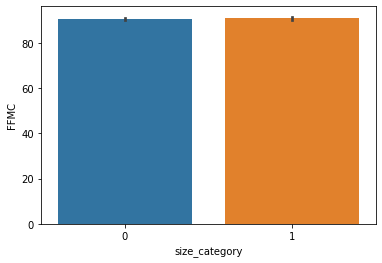

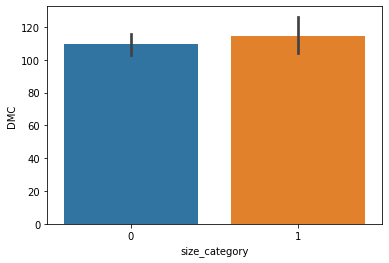

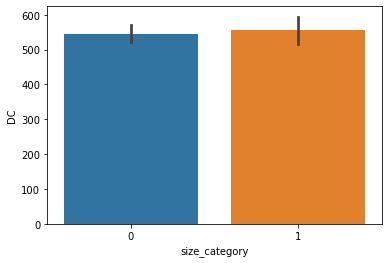

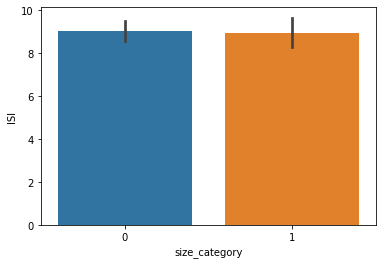

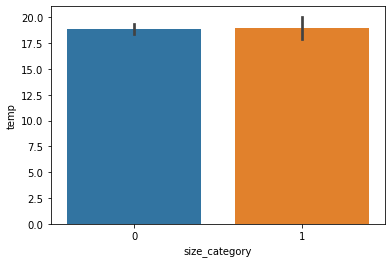

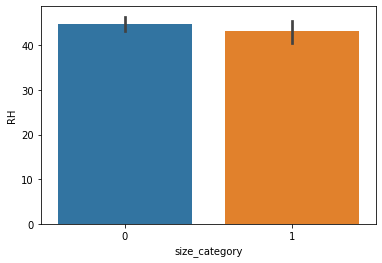

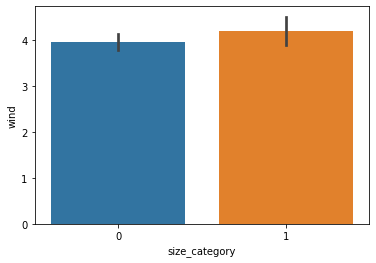

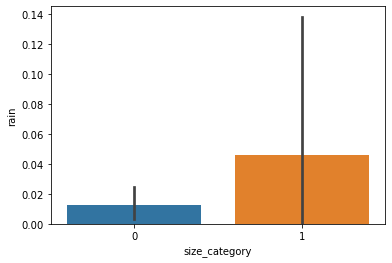

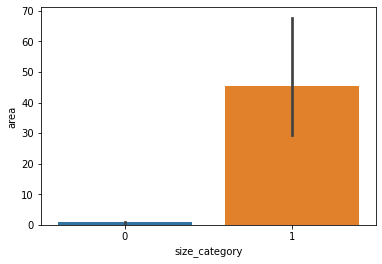

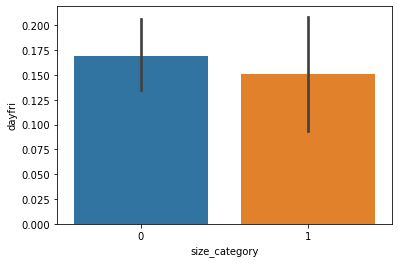

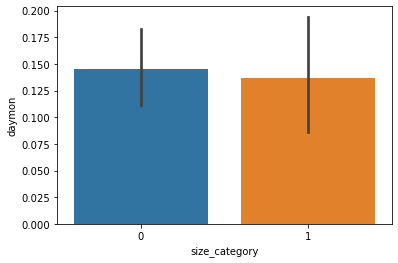

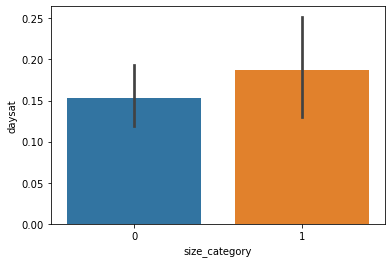

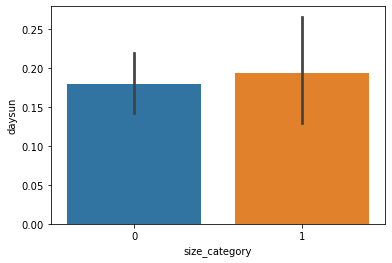

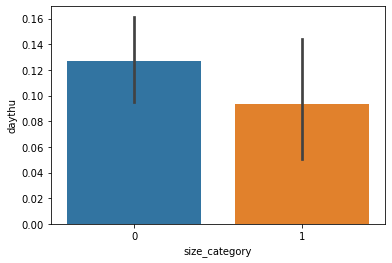

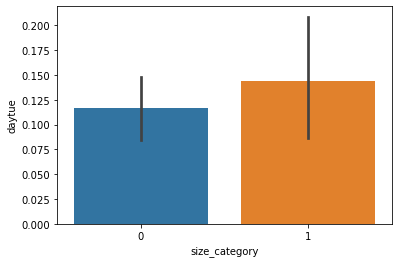

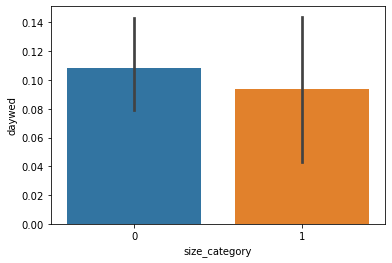

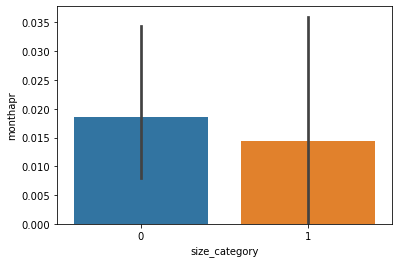

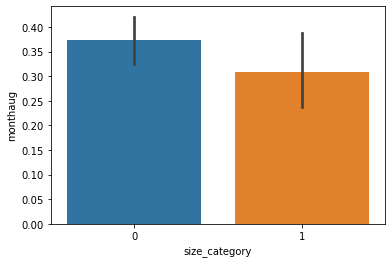

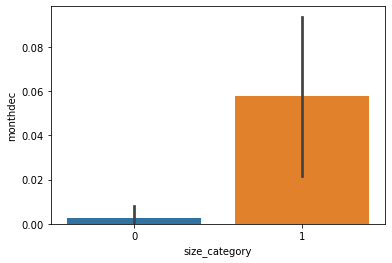

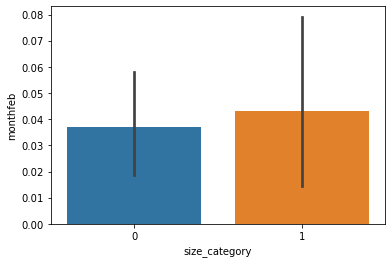

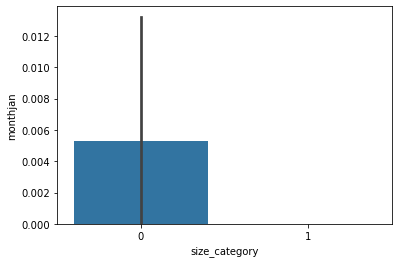

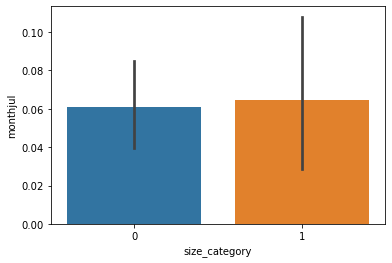

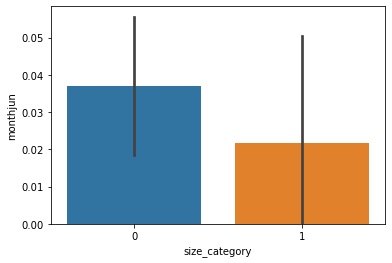

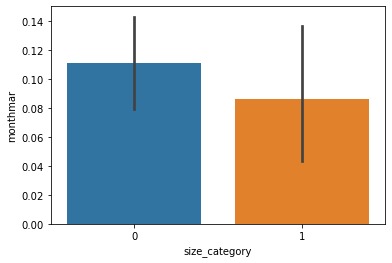

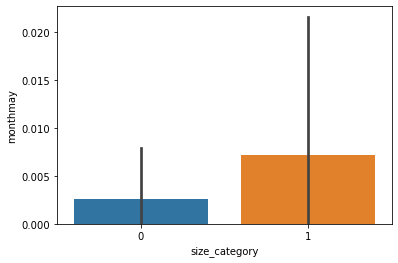

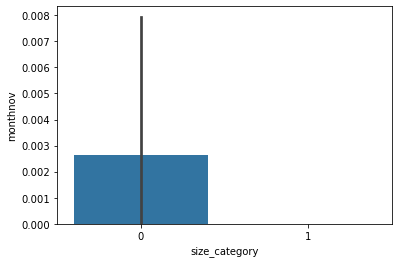

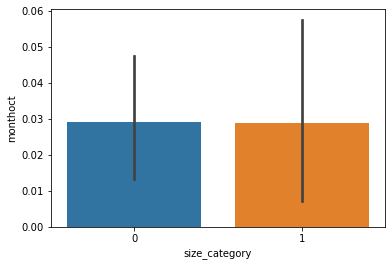

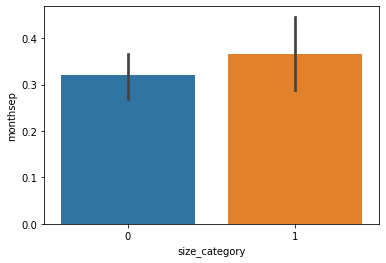

In [10]:
for i in data_.columns:
    sns.barplot(x=data['size_category'],y=data[i]) #plotting a barplot for each input feature of 3 different class.
    plt.ylabel(i)
    plt.xlabel('size_category')
    plt.show()

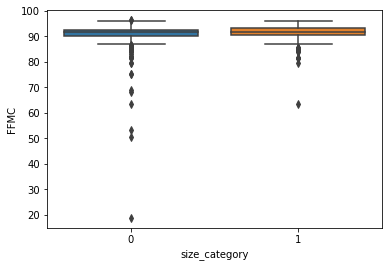

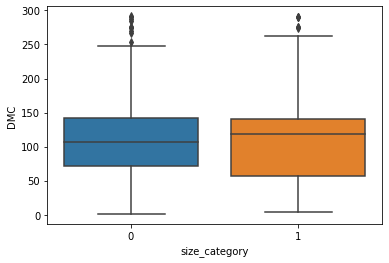

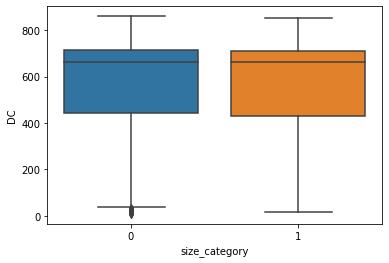

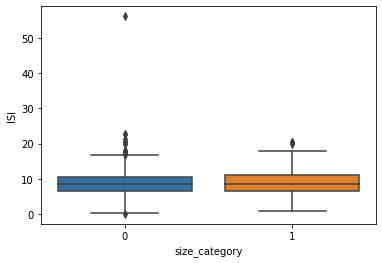

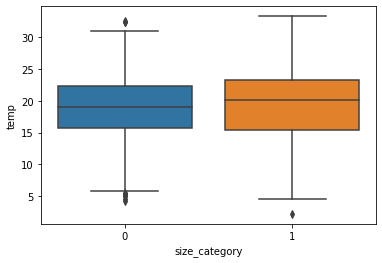

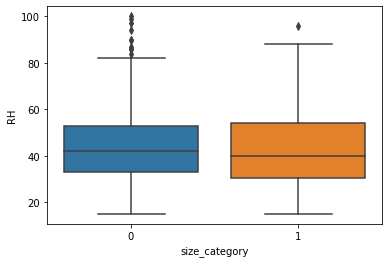

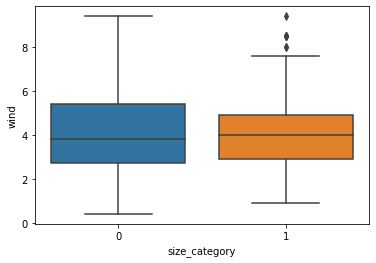

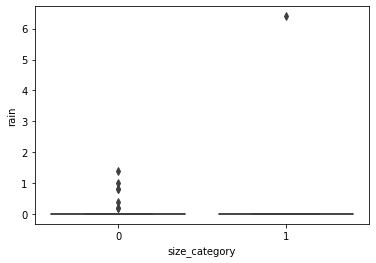

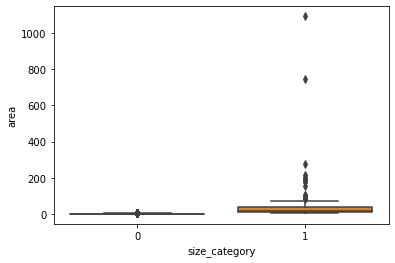

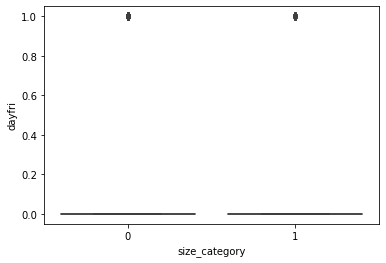

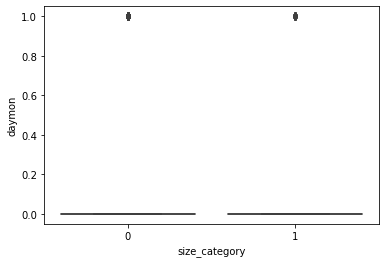

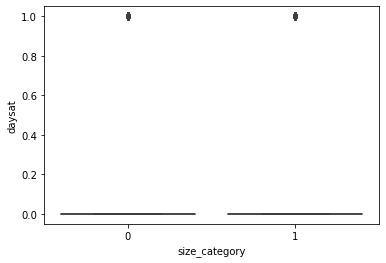

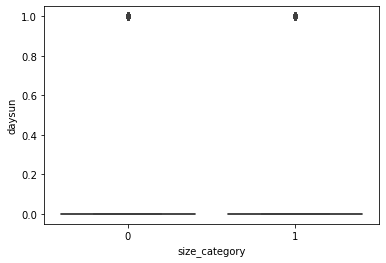

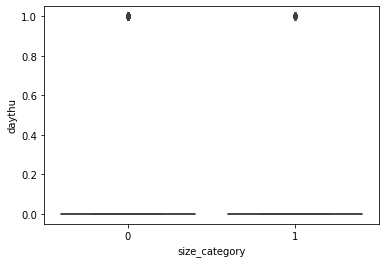

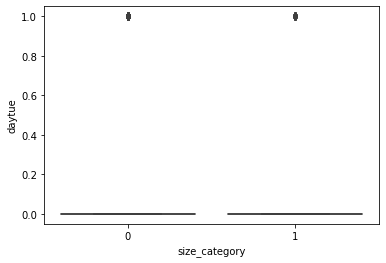

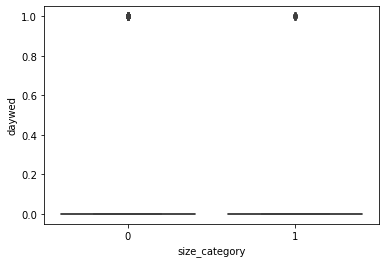

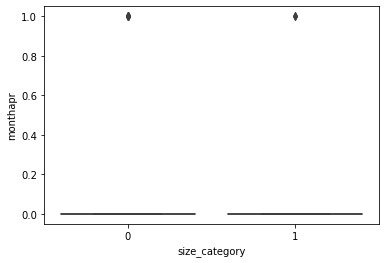

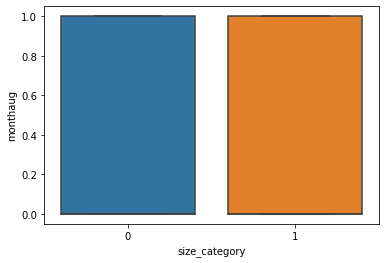

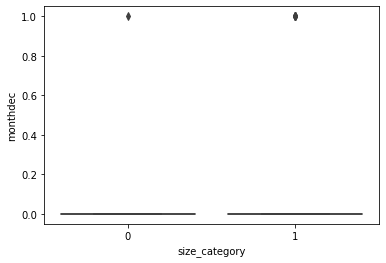

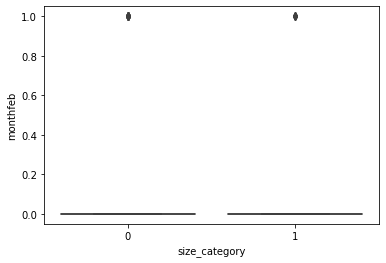

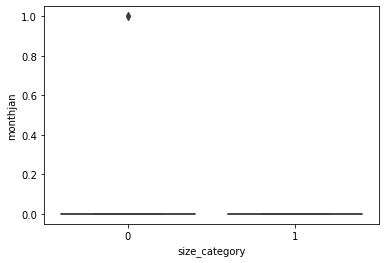

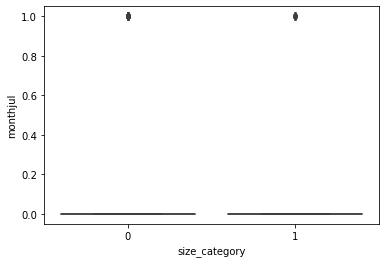

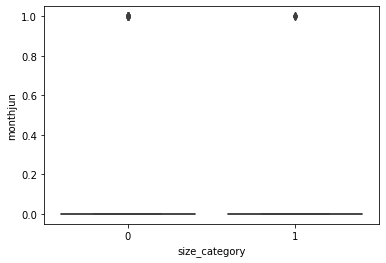

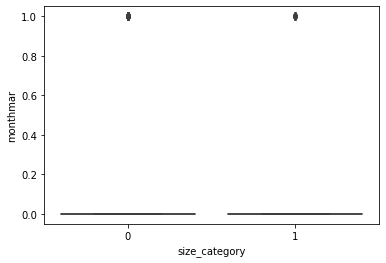

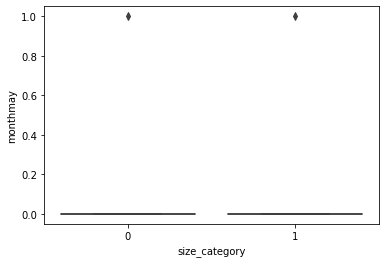

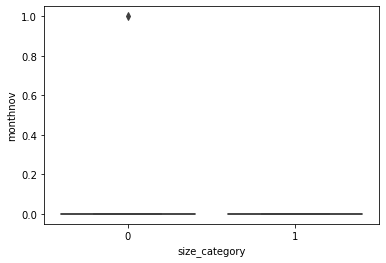

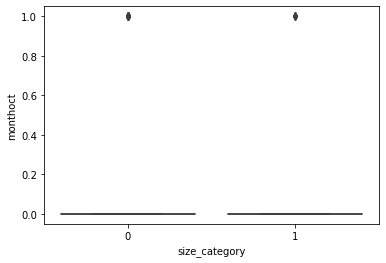

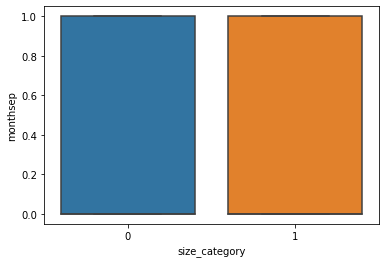

In [11]:
for i in data_.columns:
    sns.boxplot(x=data['size_category'],y=data[i]) #plotting a barplot for each input feature of 3 different class.
    plt.ylabel(i)
    plt.xlabel('size_category')
    plt.show()

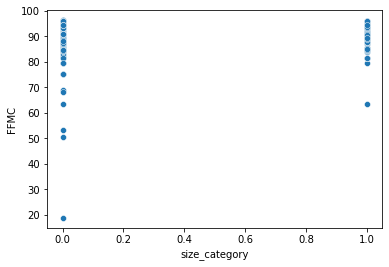

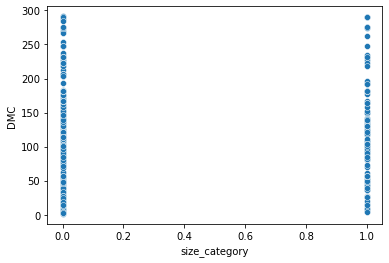

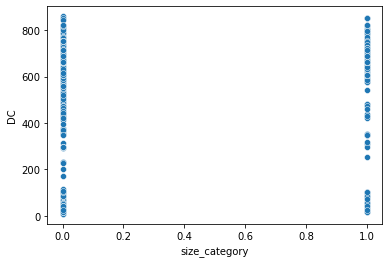

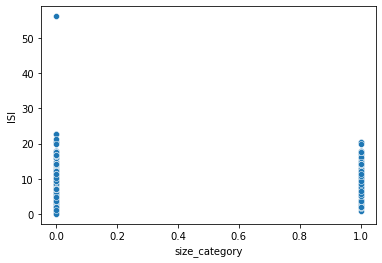

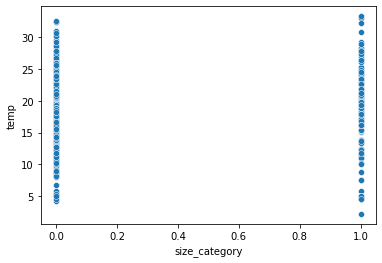

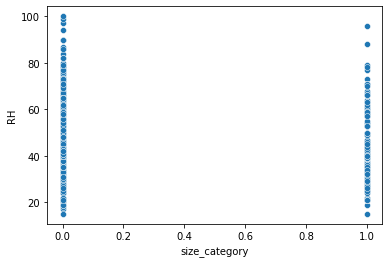

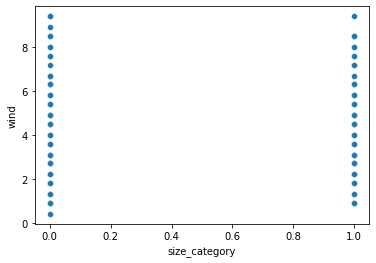

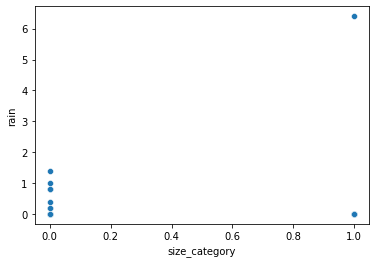

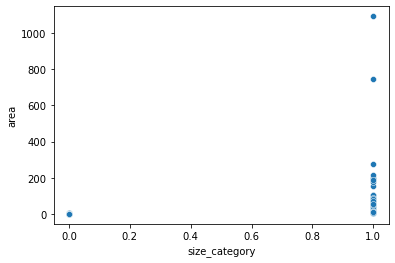

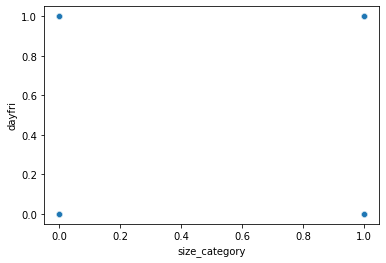

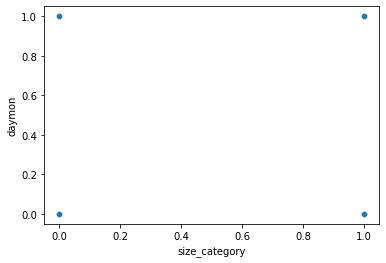

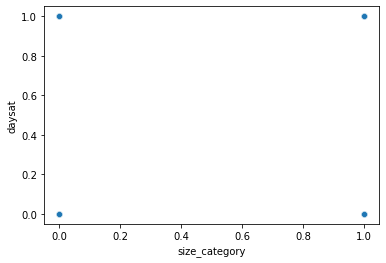

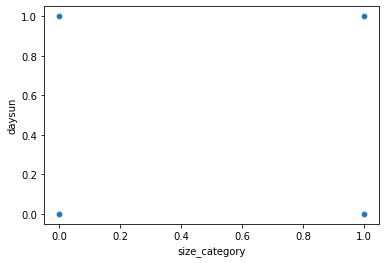

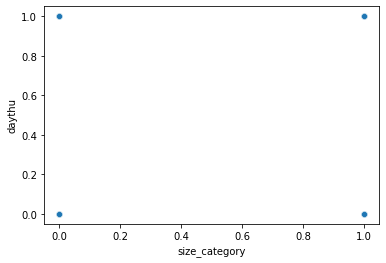

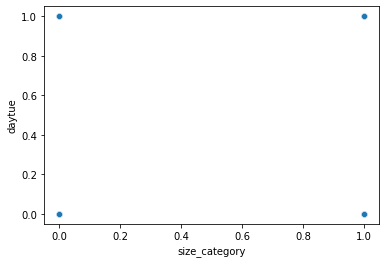

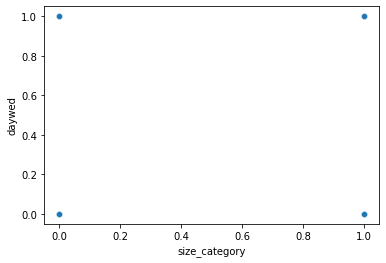

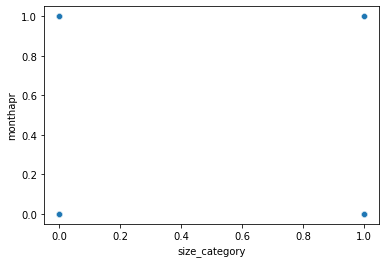

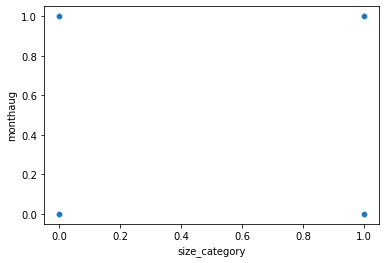

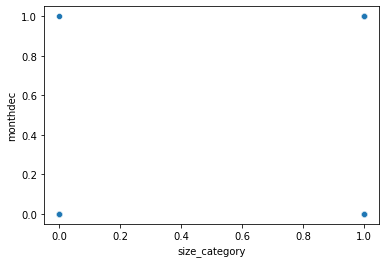

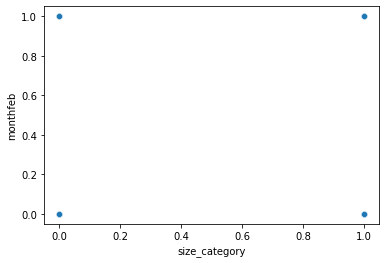

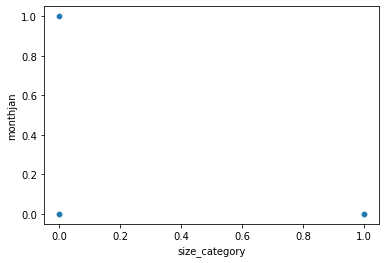

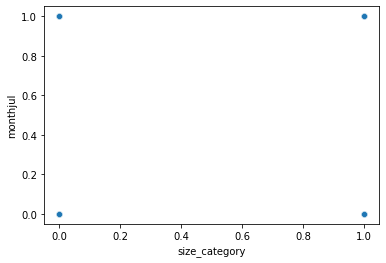

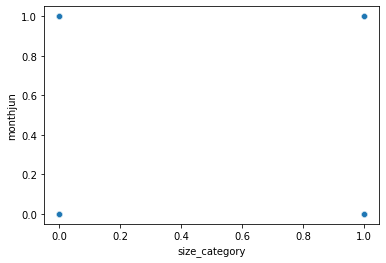

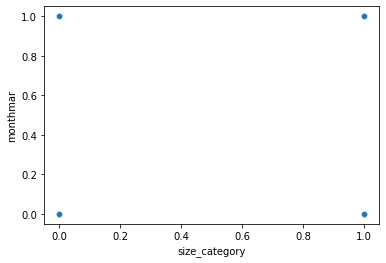

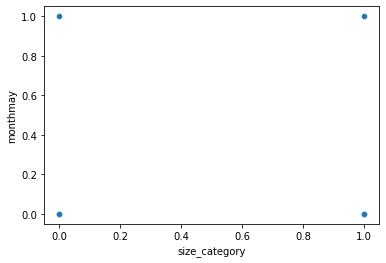

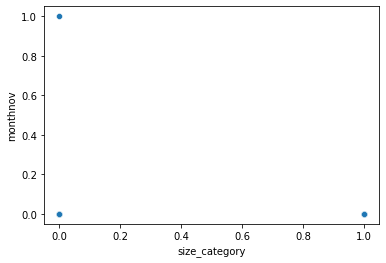

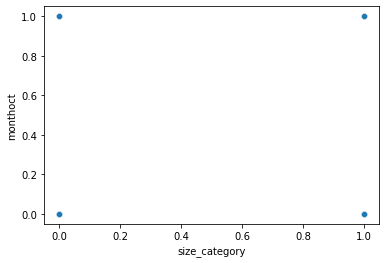

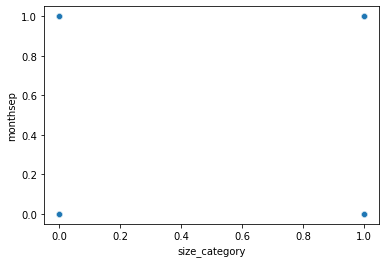

In [12]:
for i in data_.columns:
    sns.scatterplot(x=data['size_category'],y=data[i]) #plotting a barplot for each input feature of 3 different class.
    plt.ylabel(i)
    plt.xlabel('size_category')
    plt.show()

###### I am using dtale library to obtain all the visualisation plots and statistics of the dataset

In [13]:
import dtale
dtale.show(data)

In [14]:
import sweetviz as sv
report=sv.analyze(data)
report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Slicing the dataset to the dependent and independent features.

In [15]:
X=data.iloc[:,0:27] #independent feature
y=data.iloc[:,-1] #dependent feature

In [16]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)
y=y.to_numpy()
print(X)
print(y)

[[-8.05959472e-01 -1.32332557e+00 -1.83047676e+00 ... -6.23176953e-02
  -4.40225453e-02 -1.72859706e-01]
 [-8.10203395e-03 -1.17954077e+00  4.88890915e-01 ... -6.23176953e-02
  -4.40225453e-02  5.78503817e+00]
 [-8.10203395e-03 -1.04982188e+00  5.60715454e-01 ... -6.23176953e-02
  -4.40225453e-02  5.78503817e+00]
 ...
 [-1.64008316e+00 -8.46647711e-01  4.74768113e-01 ... -6.23176953e-02
  -4.40225453e-02 -1.72859706e-01]
 [ 6.80956663e-01  5.49002541e-01  2.69382214e-01 ... -6.23176953e-02
  -4.40225453e-02 -1.72859706e-01]
 [-2.02087875e+00 -1.68591332e+00 -1.78044169e+00 ... -6.23176953e-02
   2.27156334e+01 -1.72859706e-01]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### Performing Standardisation using sklearn Standardscaler and fitting it to train and test dataset.Since the high magnitude features are dominant over the low magnitude ones, we perform standarisation of the features using the stanfdardscaler.

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=56) #splitting the train and test dataset with
#test size as 0.3 and random state as 56 for reproducibility.

## Model Building

##### Building an Artificial neural network and performing hyperparameter tuning on the no. of layers and the neurons. Activation function is sigmoid since this is a classification problem.

In [26]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units',
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
            loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [29]:
tuner=RandomSearch(
   build_model,
   objective='val_accuracy',
   max_trials=5,
   executions_per_trial=3,
   directory='project',
   project_name='Forest Fire__')

In [30]:
tuner.search_space_summary()

In [31]:

tuner.search(x_train, y_train,
             epochs=5,
             validation_data=(x_test, y_test))

Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.46 - ETA: 0s - loss: 0.6922 - accuracy: 0.67 - ETA: 0s - loss: 0.6908 - accuracy: 0.68 - 0s 39ms/step - loss: 0.6908 - accuracy: 0.6842 - val_loss: 0.6832 - val_accuracy: 0.7756
Epoch 2/5
12/12 [==============================] - ETA: 0s - loss: 0.6876 - accuracy: 0.65 - ETA: 0s - loss: 0.6801 - accuracy: 0.71 - 0s 9ms/step - loss: 0.6774 - accuracy: 0.7119 - val_loss: 0.6420 - val_accuracy: 0.7756
Epoch 3/5
12/12 [==============================] - ETA: 0s - loss: 0.6375 - accuracy: 0.81 - ETA: 0s - loss: 0.6205 - accuracy: 0.73 - 0s 8ms/step - loss: 0.6356 - accuracy: 0.7119 - val_loss: 0.5508 - val_accuracy: 0.7756
Epoch 4/5
12/12 [==============================] - ETA: 0s - loss: 0.7288 - accuracy: 0.56 - ETA: 0s - loss: 0.6148 - accuracy: 0.70 - 0s 9ms/step - loss: 0.6065 - accuracy: 0.7119 - val_loss: 0.5444 - val_accuracy: 0.7756
Epoch 5/5
12/12 [==============================] - ETA: 0s - loss

Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 0.7183 - accuracy: 0.21 - 0s 22ms/step - loss: 0.6626 - accuracy: 0.6510 - val_loss: 0.5478 - val_accuracy: 0.7756
Epoch 2/5
12/12 [==============================] - ETA: 0s - loss: 0.4752 - accuracy: 0.81 - 0s 9ms/step - loss: 0.5792 - accuracy: 0.7119 - val_loss: 0.5327 - val_accuracy: 0.7821
Epoch 3/5
12/12 [==============================] - ETA: 0s - loss: 0.6771 - accuracy: 0.59 - 0s 10ms/step - loss: 0.5343 - accuracy: 0.7396 - val_loss: 0.5278 - val_accuracy: 0.7949
Epoch 4/5
12/12 [==============================] - ETA: 0s - loss: 0.4198 - accuracy: 0.84 - 0s 5ms/step - loss: 0.4743 - accuracy: 0.7812 - val_loss: 0.5594 - val_accuracy: 0.7564
Epoch 5/5
12/12 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.81 - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8283 - val_loss: 0.5850 - val_accuracy: 0.7115
Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 0.6999 - accuracy: 0.56 - 

Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 0.6898 - accuracy: 0.62 - 0s 26ms/step - loss: 0.6739 - accuracy: 0.7119 - val_loss: 0.6445 - val_accuracy: 0.7756
Epoch 2/5
12/12 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.62 - 0s 5ms/step - loss: 0.6457 - accuracy: 0.7119 - val_loss: 0.5969 - val_accuracy: 0.7756
Epoch 3/5
12/12 [==============================] - ETA: 0s - loss: 0.6555 - accuracy: 0.62 - 0s 5ms/step - loss: 0.6176 - accuracy: 0.7119 - val_loss: 0.5577 - val_accuracy: 0.7756
Epoch 4/5
12/12 [==============================] - ETA: 0s - loss: 0.6050 - accuracy: 0.71 - 0s 5ms/step - loss: 0.5969 - accuracy: 0.7119 - val_loss: 0.5383 - val_accuracy: 0.7756
Epoch 5/5
12/12 [==============================] - ETA: 0s - loss: 0.5618 - accuracy: 0.71 - 0s 5ms/step - loss: 0.5792 - accuracy: 0.7119 - val_loss: 0.5307 - val_accuracy: 0.7756
Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 0.6865 - accuracy: 0.65 - 0

Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.65 - ETA: 0s - loss: 37.9976 - accuracy: 0.679 - ETA: 0s - loss: 22.2906 - accuracy: 0.714 - ETA: 0s - loss: 17.4805 - accuracy: 0.718 - ETA: 0s - loss: 14.0800 - accuracy: 0.709 - 1s 60ms/step - loss: 14.0800 - accuracy: 0.7091 - val_loss: 0.6279 - val_accuracy: 0.7756
Epoch 2/5
12/12 [==============================] - ETA: 0s - loss: 0.6348 - accuracy: 0.75 - ETA: 0s - loss: 0.6275 - accuracy: 0.72 - ETA: 0s - loss: 0.6291 - accuracy: 0.70 - ETA: 0s - loss: 0.6128 - accuracy: 0.71 - 0s 24ms/step - loss: 0.6198 - accuracy: 0.7119 - val_loss: 0.5356 - val_accuracy: 0.7756
Epoch 3/5
12/12 [==============================] - ETA: 0s - loss: 0.7014 - accuracy: 0.62 - ETA: 0s - loss: 0.5784 - accuracy: 0.75 - ETA: 0s - loss: 0.5983 - accuracy: 0.72 - ETA: 0s - loss: 0.6001 - accuracy: 0.72 - 0s 22ms/step - loss: 0.6083 - accuracy: 0.7119 - val_loss: 0.5695 - val_accuracy: 0.7756
Epoch 4/5
12/12 [========

Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.21 - ETA: 0s - loss: 0.6863 - accuracy: 0.64 - ETA: 0s - loss: 0.6753 - accuracy: 0.65 - 1s 48ms/step - loss: 0.6683 - accuracy: 0.6620 - val_loss: 0.5585 - val_accuracy: 0.7756
Epoch 2/5
12/12 [==============================] - ETA: 0s - loss: 0.5768 - accuracy: 0.75 - ETA: 0s - loss: 0.6278 - accuracy: 0.69 - ETA: 0s - loss: 0.6164 - accuracy: 0.71 - 0s 13ms/step - loss: 0.6164 - accuracy: 0.7119 - val_loss: 0.5497 - val_accuracy: 0.7756
Epoch 3/5
12/12 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.62 - ETA: 0s - loss: 0.6188 - accuracy: 0.69 - ETA: 0s - loss: 0.6095 - accuracy: 0.70 - 0s 15ms/step - loss: 0.6015 - accuracy: 0.7119 - val_loss: 0.5375 - val_accuracy: 0.7756
Epoch 4/5
12/12 [==============================] - ETA: 0s - loss: 0.6886 - accuracy: 0.62 - ETA: 0s - loss: 0.6029 - accuracy: 0.71 - ETA: 0s - loss: 0.6029 - accuracy: 0.71 - 0s 15ms/step - loss: 0.60

INFO:tensorflow:Oracle triggered exit


2021-09-05 16:34:09,826 - INFO     - Oracle triggered exit


In [33]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal no. of layers is {best_hps.get('num_layers')}The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal no. of layers is 6The optimal number of units in the first densely-connected
layer is 160 and the optimal learning rate for the optimizer
is 0.001.



In [34]:
#Building the model with the best hyperparameters
hypermodel = tuner.hypermodel.build(best_hps)

In [35]:
hypermodel.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
9/9 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.62 - 0s 28ms/step - loss: 0.6280 - accuracy: 0.7188 - val_loss: 0.6676 - val_accuracy: 0.6438
Epoch 2/5
9/9 [==============================] - ETA: 0s - loss: 0.6121 - accuracy: 0.71 - 0s 5ms/step - loss: 0.5633 - accuracy: 0.7431 - val_loss: 0.6417 - val_accuracy: 0.6712
Epoch 3/5
9/9 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.75 - 0s 5ms/step - loss: 0.5030 - accuracy: 0.7674 - val_loss: 0.6105 - val_accuracy: 0.6986
Epoch 4/5
9/9 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.81 - 0s 5ms/step - loss: 0.4881 - accuracy: 0.7847 - val_loss: 0.8168 - val_accuracy: 0.7123
Epoch 5/5
9/9 [==============================] - ETA: 0s - loss: 0.3034 - accuracy: 0.84 - 0s 5ms/step - loss: 0.4252 - accuracy: 0.8194 - val_loss: 0.7060 - val_accuracy: 0.6712


We see that the accuracy is somewhere around 82%